         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB
None
              Unit          Sales
count  7560.000000    7560.000000
mean     18.005423   45013.558201
std      12.901403   32253.506944
min       2.000000    5000.000000
25%       8.000000   20000.000000
50%      14.000

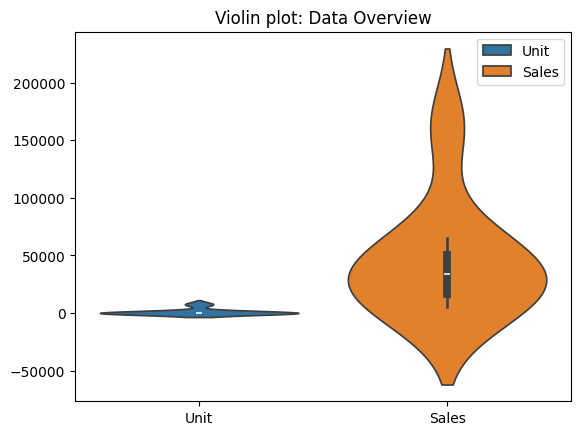

Missing Values per Column:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
DataFrame after cleaning data by standardizing formats:
           Date        Time State     Group  Unit  Sales
0    2020-10-01     Morning    WA      Kids     8  20000
1    2020-10-01     Morning    WA       Men     8  20000
2    2020-10-01     Morning    WA     Women     4  10000
3    2020-10-01     Morning    WA   Seniors    15  37500
4    2020-10-01   Afternoon    WA      Kids     3   7500
...         ...         ...   ...       ...   ...    ...
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000
7556 2020-12-30     Evening   TAS      Kids    15  37500
7557 2020-12-30     Evening   TAS       Men    15  37500
7558 2020-12-30     Evening   TAS     Women    11  27500
7559 2020-12-30     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]
DataFrame with sales normalized and winsorized column:
           Date        Time State     Group  Unit  Sales  Sales_normalized

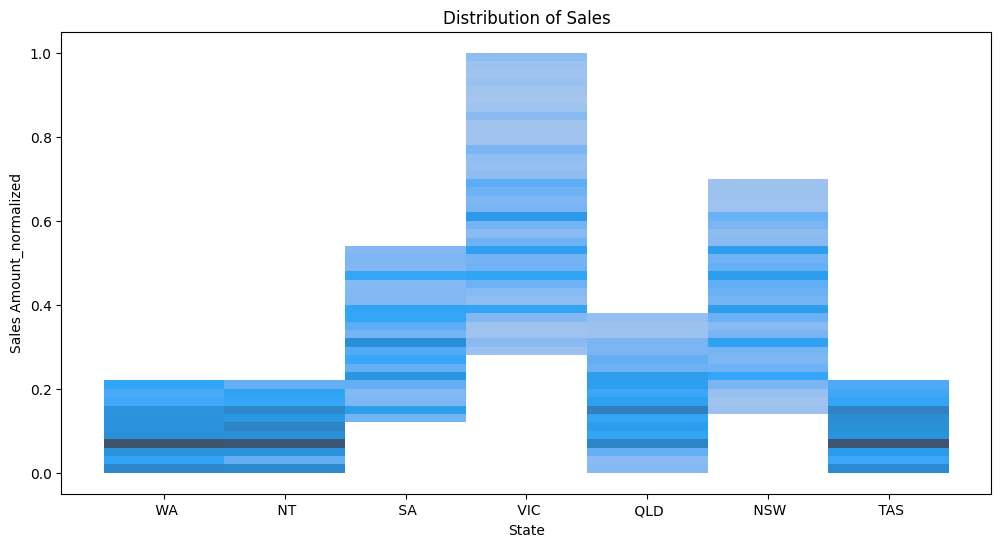

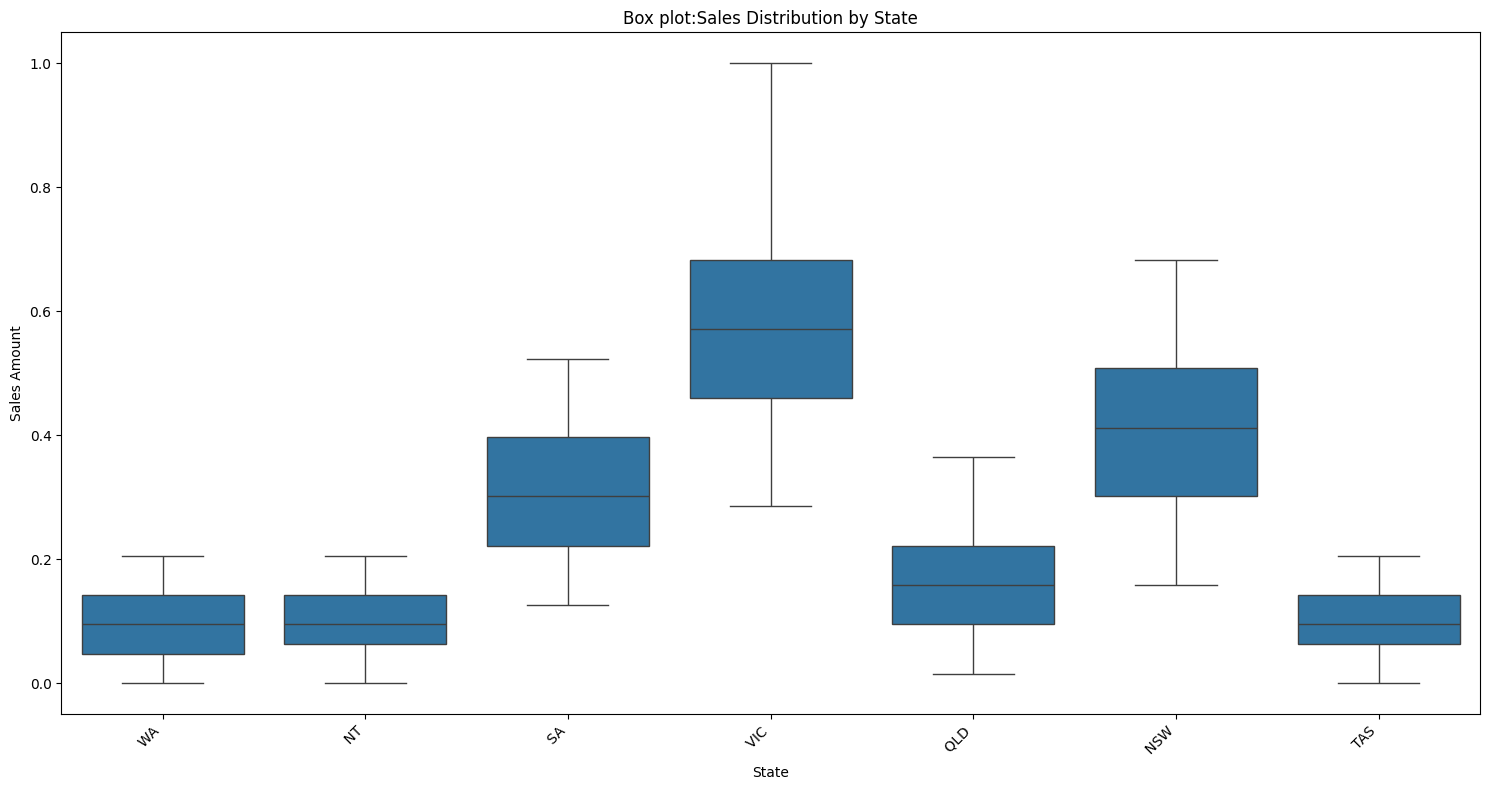

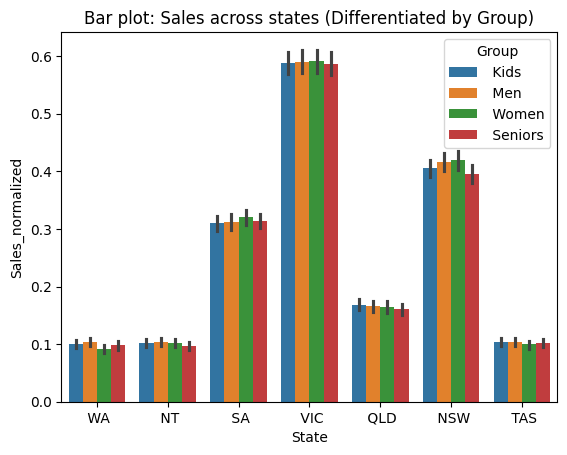

grouped_sales


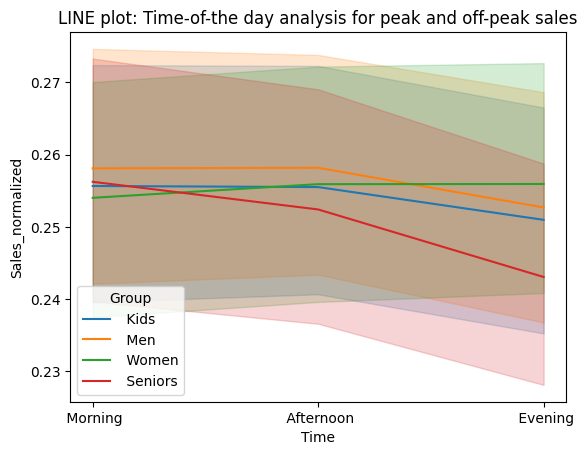

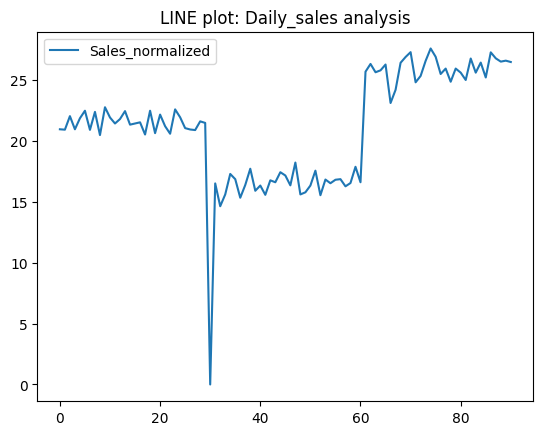

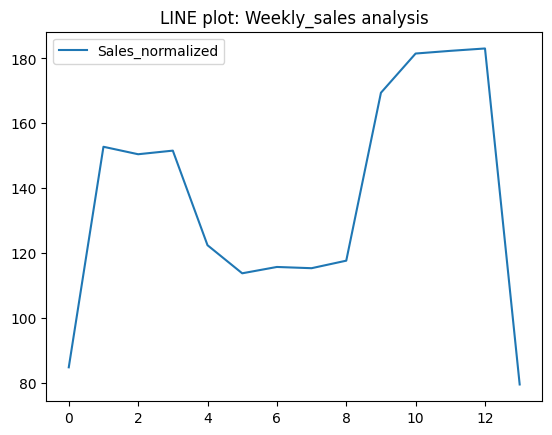

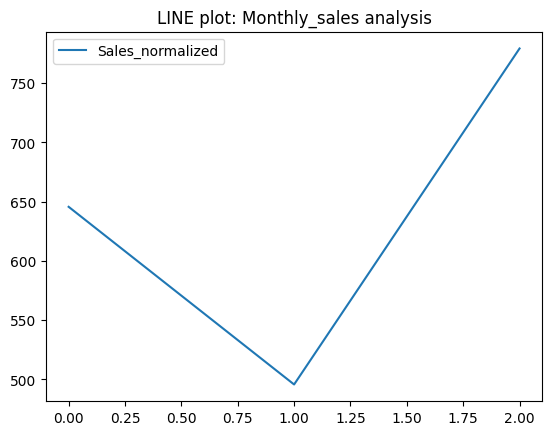

In [20]:
'''source code, original Raw data and cleaned Normalized data files can be found in the zip file attached. I have used Box plot and bar plot for sales distribution with sales Normalized data , as many age groups were involved with many states . Bar plot seemed correct approach to represent the data with different gender groups.
I am using line plot for showing the daily, weekly, monthly and Time of the day analysis as it explains each the peaks and how it is scaling by the time of the day and daily weekly, monthly data.
I have used Violin plot for catching the overview of entire data, like mean, median standard deviation of the sales numbers.

I have also added distplot as per the suggestions from the problem statement but i donot see any major differences compared to histogram or bar plots

Any feedback is highly appreciated.
'''
#Sales analysis for AAL, established in 2000, is a well-known brand in Australia.

#import libraries Path, Pandas, numpy,plotly,seaborn, matplotlib,sklearn and scipy for data cleaning and wrangling
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.tools as tls
import plotly.offline as py
from sklearn.preprocessing import MinMaxScaler
from scipy.stats.mstats import winsorize

#file_path = Path('your_file.csv')

file_path = Path("C:\\Users\\DELL\\Downloads\\Instructor_Slides_and_Notebooks (1)\\Lesson_10_Feature_Engineering\\1739523823_ausapparalsales4thqrt2020 (3)\\AusApparalSales4thQrt2020.csv")
# if file is is present int the path, read the file and perform data cleaning operations. 
if file_path.is_file():
    df = pd.read_csv(file_path)
    print(df.head()) # Print the first few rows of the DataFrame
    print(df.info())
    print(df.describe())
    df.dtypes
# Load a sample dataset
# Violin Plot
    sns.violinplot(data=df.describe(),legend = "full" )
    plt.title('Violin plot: Data Overview')
    plt.show()

#check for the missing values in file and print if any. Also check for duplicates and drop them from the data
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values)
    #df_no_duplicates = df.drop_duplicates()
    #print("printing Duplicates")
    #print(df_no_duplicates)
# Cleaning data by standardizing formats
    df['Date'] = pd.to_datetime(df['Date'])

# Displaying the DataFrame after cleaning
    
    print("DataFrame after cleaning data by standardizing formats:")
    print(df)
    column_to_normalize = df[['Sales']]
    
 # Create a MinMaxScaler object for Normalization, winsorize for the outliers, add the winsorized and normalized sales back to the CSV file.
    scaler = MinMaxScaler()
    normalized_values = scaler.fit_transform(column_to_normalize)
    df['Sales_normalized'] = normalized_values
    df.to_csv('normalized_sample_data.csv', index=False)
    #print(df)
    df['Winsorized_Sales'] = winsorize(df['Sales_normalized'], limits=[0.05, 0.05])
    df.to_csv('normalized_sample_data.csv', index=False)
    print("DataFrame with sales normalized and winsorized column:")
    print(df)
    df['comparison_result'] = df['Sales_normalized'] == df['Winsorized_Sales']
    df.to_csv('normalized_sample_data.csv', index=False)
    print('comparison_result')
    print(df)
# Group by 'category' and calculate the sum of 'Sales' for each category
    grouped_sales = df.groupby('Group')['Sales'].sum()  
# Find the category with the highest sales
    highest_sales_category = grouped_sales.idxmax()  
    highest_sales_value = grouped_sales.max()  

# Find the category with the lowest sales
    lowest_sales_category = grouped_sales.idxmin()  
    lowest_sales_value = grouped_sales.min()  

    print(f"Group with the highest sales: {highest_sales_category} ({highest_sales_value})") 
    print(f"Group with the lowest sales: {lowest_sales_category} ({lowest_sales_value})") 
# --- Aggregation and Analysis ---
    print("Performing data aggregation...")

 # Set the 'date' column as the DataFrame's index
    df = df.set_index('Date')
    
# Resample and calculate total sales for different frequencies and write to csv files
    Daily_sales = df['Sales_normalized'].resample('D').sum().reset_index()
    Daily_sales.to_csv('Daily_sales_normalized.csv', index = False)
    weekly_sales = df['Sales_normalized'].resample('W').sum().reset_index()
    weekly_sales.to_csv('weekly_sales_normalized.csv', index = False)
    monthly_sales = df['Sales_normalized'].resample('MS').sum().reset_index()
    monthly_sales.to_csv('monthly_sales_normalized.csv', index = False)
    quarterly_sales = df['Sales_normalized'].resample('QS').sum().reset_index()
    quarterly_sales.to_csv('quarterly_data_normalized.csv', index = False)

# Generate a descriptive summary for the report
    print(f"total_sales : {df['Sales'].sum()}")
    print(f"total_sales_normalized : {df['Sales_normalized'].sum()}")
    print(f"average_Daily_sales : {Daily_sales['Sales_normalized'].mean()}")
    print(f"average_weekly_sales : {weekly_sales['Sales_normalized'].mean()}")
    print(f"average_monthly_sales : {monthly_sales['Sales_normalized'].mean()}")
    print(f"average_quarterly_sales = {quarterly_sales['Sales_normalized'].mean()}")
    #df1 = pd.read_csv('normalized_sample_data.csv')
    #df2 = pd.read_csv('normalized_sample_data1.csv')
    #differences = df1.compare(df2)
    #print("Differences between files:")
    #print(differences)

# Aggregate total sales per state
    state_sales = df.groupby('State')['Sales'].sum().reset_index()


# Histogram of Sales distribution 
    plt.figure(figsize=(12, 6))
    #sns.histplot(df['Sales_normalized'], kde=True, bins=50)
    sns.histplot(data = df, y='Sales_normalized',x = 'State',fill= False,multiple = "dodge", bins = 50)
    #sns.stripplot(data=df, x="State", y="Sales_normalized", hue = "Group", dodge = True)
    plt.title('Distribution of Sales')
    plt.ylabel('Sales Amount_normalized')
    plt.xlabel('State')
    plt.show()

# seaborn Displot for statewise sales distribution
    
    sns.displot(x='State', y='Sales_normalized', data=df, hue= 'Group')
    plt.title('Dist plot: Sales distribution across states')
    plt.show()

# Box plot of Sales by State
    plt.figure(figsize=(15, 8))
    sns.boxplot(x='State', y='Sales_normalized', data=df)
    #plt.title('Bar plot: Sales across states (Differentiated by Group)')
    plt.title('Box plot:Sales Distribution by State')
    plt.xlabel('State')
    plt.ylabel('Sales Amount')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()

# Bar Plot
    sns.barplot(x='State', y='Sales_normalized', data=df, hue='Group')
    plt.title('Bar plot: Sales across states (Differentiated by Group)')
    plt.show()
    
#	Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. 
#    This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.
# using line plot for this 
# Group by 'category' and calculate the sum of 'Sales' for each category
    
    grouped_sales = df.groupby('Group')['Sales_normalized'].sum()
    print("grouped_sales")
    sns.lineplot(data = grouped_sales)
    plt.title('LINE plot: Group analysis for highest and lowest sales')
    #plotly_fig = tls.mpl_to_plotly(plt.gcf())
    #py.iplot(plotly_fig)
    plt.show()
    plt.title('LINE plot: Time-of-the day analysis for peak and off-peak sales')
    sns.lineplot(data=df, x="Time", y="Sales_normalized", hue="Group")
    #sns.lineplot(data=df, x="Time", y="Sales_normalized", hue="Group")
    #plotly_fig = tls.mpl_to_plotly(plt.gcf())
    #py.iplot(plotly_fig)
    plt.show()
    plt.title('LINE plot: Daily_sales analysis')
    sns.lineplot(data=Daily_sales)
    plt.show()
    plt.title('LINE plot: Weekly_sales analysis')
    sns.lineplot(data=weekly_sales)
    plt.show()
    plt.title('LINE plot: Monthly_sales analysis')
    sns.lineplot(data=monthly_sales)
    plt.show()
   # sns.lineplot(data=quarterly_sales)
   # plt.show()

else:
    print(f"Error: The file '{file_path}' does not exist.")
